In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('bank.csv',sep=';',na_values='Unknow')

In [29]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [47]:
sns. data['Attrition_Flag'].value_counts(normalize=True)

AttributeError: 'Series' object has no attribute 'pie'

In [30]:
#plt.figure(figsize=(18,8))
#sns.pairplot(df,hue="Attrition_Flag")
# [Q1-1.5*IIQ,Q3+1.5*IIQ]
def valeurAberante(data):
    abberant_dict = {}
    for col in data.colums:
        Q1 = np.quantile(data[col],0.25)
        Q3 = np.quantile(data[col],0.75)
        IIQ = Q3 - Q1
        bornInf = Q1-1.5*IIQ
        bornSup = Q3+1.5*IIQ
        abberantVal = []
        for i in data[col]:
            if bornInf <= i <= bornSup :
                pass
            else:
                abberantVal.append(i)
        abberant_dict[col] = abberantVal
    return abberant_dict

In [31]:
data = data.drop(['CLIENTNUM'],axis=1)
data = data.dropna(axis=0)

In [32]:
df_quanti = data.select_dtypes(exclude=object)

In [45]:
#Verification de l'échelle des variable
plt.figure(figsize=(25,12))
plt.lines(df_quanti['Credit_Limit'].max())
sns.boxplot(data=df_quanti)
plt.show()

TypeError: vlines() missing 2 required positional arguments: 'ymin' and 'ymax'

<Figure size 1800x864 with 0 Axes>

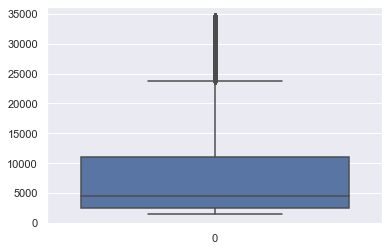

In [34]:
sns.boxplot(data=df_quanti['Credit_Limit'])
plt.show()

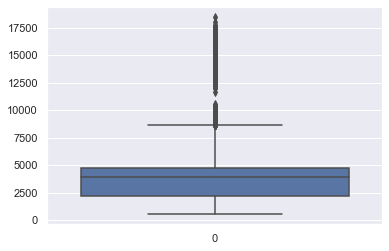

In [35]:
sns.boxplot(data=df_quanti['Total_Trans_Amt'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

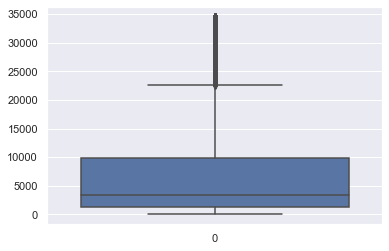

In [36]:
sns.boxplot(data=df_quanti['Avg_Open_To_Buy'])
plt.show

In [37]:
val_1 = valeurAberante(df_quanti['Credit_Limit'])
val_2 = valeurAberante(df_quanti['Total_Trans_Amt'])
val_3 = valeurAberante(df_quanti['Avg_Open_To_Buy'])
print('Credit_Limit :',len(val_1))
print('Total_Trans_Amt :',len(val_2))
print('Avg_Open_To_Buy',len(val_3))

Credit_Limit : 984
Total_Trans_Amt : 896
Avg_Open_To_Buy 963


In [38]:
df_quanti['Credit_Limit'],fitted_lmda = stats.boxcox(df_quanti['Credit_Limit'],lmbda=None)
df_quanti['Total_Trans_Amt'],fitted_lmda = stats.boxcox(df_quanti['Total_Trans_Amt'],lmbda=None)
df_quanti['Avg_Open_To_Buy'],fitted_lmda = stats.boxcox(df_quanti['Avg_Open_To_Buy'],lmbda=None)

In [39]:
val_1 = valeurAberante(df_quanti['Credit_Limit'])
val_2 = valeurAberante(df_quanti['Total_Trans_Amt'])
val_3 = valeurAberante(df_quanti['Avg_Open_To_Buy'])
print('Credit_Limit :',len(val_1))
print('Total_Trans_Amt :',len(val_2))
print('Avg_Open_To_Buy',len(val_3))

Credit_Limit : 0
Total_Trans_Amt : 53
Avg_Open_To_Buy 15


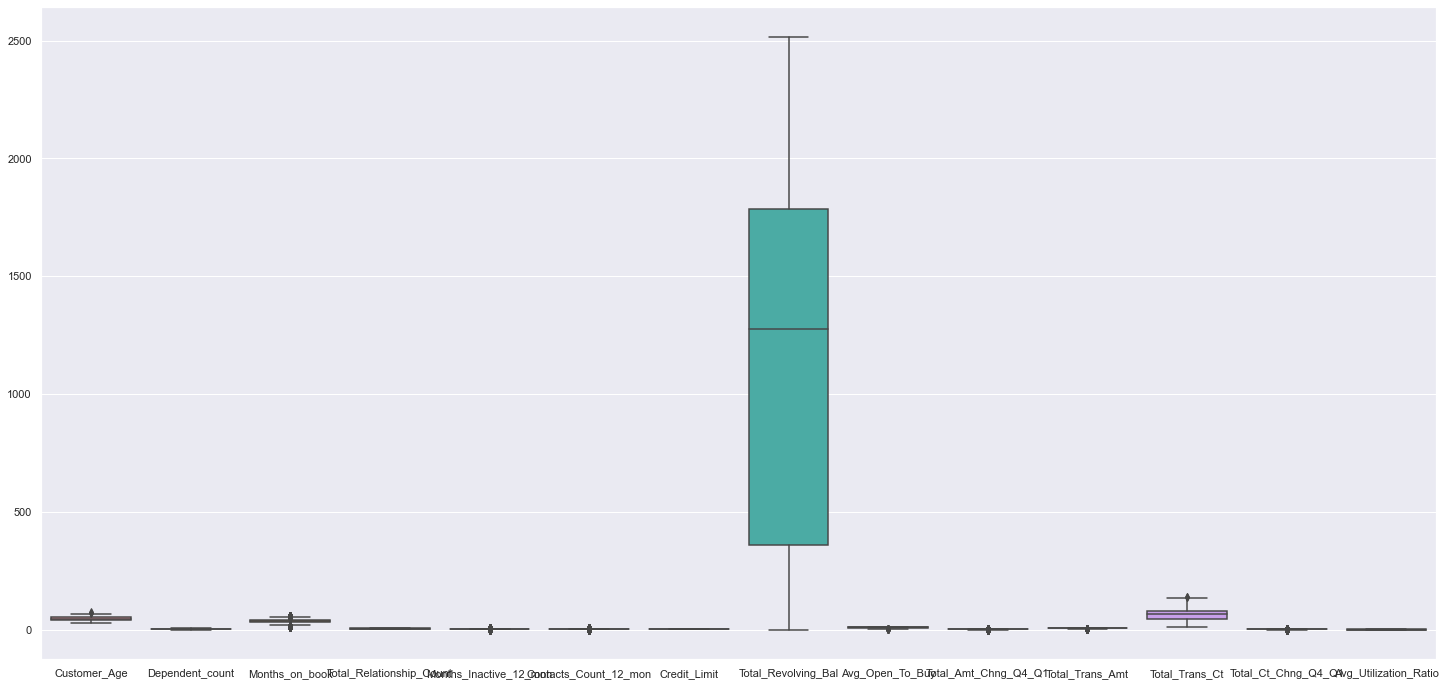

In [40]:
plt.figure(figsize=(25,12))
sns.boxplot(data=df_quanti)
plt.show()

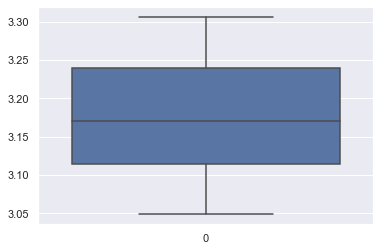

In [41]:
sns.boxplot(data=df_quanti['Credit_Limit'])
plt.show()

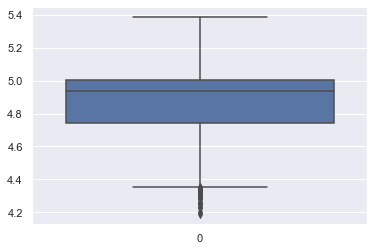

In [42]:
sns.boxplot(data=df_quanti['Total_Trans_Amt'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

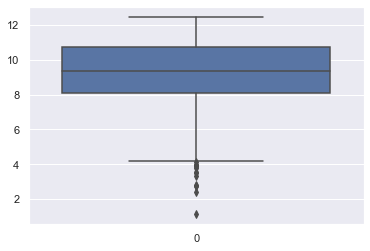

In [43]:
sns.boxplot(data=df_quanti['Avg_Open_To_Buy'])
plt.show